## Import Modules

In [1]:
from time import time # 用于计算运行时间

import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import offsetbox # 定义图形box的格式
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

import algorithm
from utils import plot_embedding

## Load Data

In [2]:
digit_dataset = datasets.load_digits()
print(digit_dataset.keys())
print(digit_dataset.target_names)
# 获取bunch中的data,target
print(digit_dataset.data)
print(digit_dataset.target)

X = digit_dataset.data
y = digit_dataset.target
n_samples, n_features = X.shape
n_neighbors = 30

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


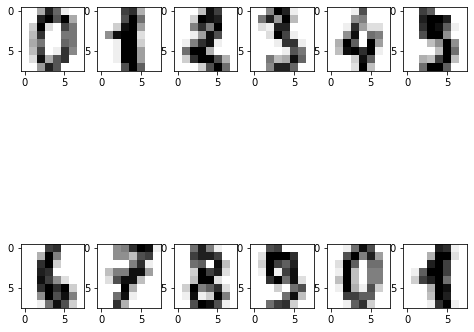

In [3]:
# plt.gray() 
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(8, 8))
for i, ax in zip(range(12),axes.flatten()):
    ax.imshow(digit_dataset.images[i], cmap=plt.cm.gray_r)
plt.show()

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

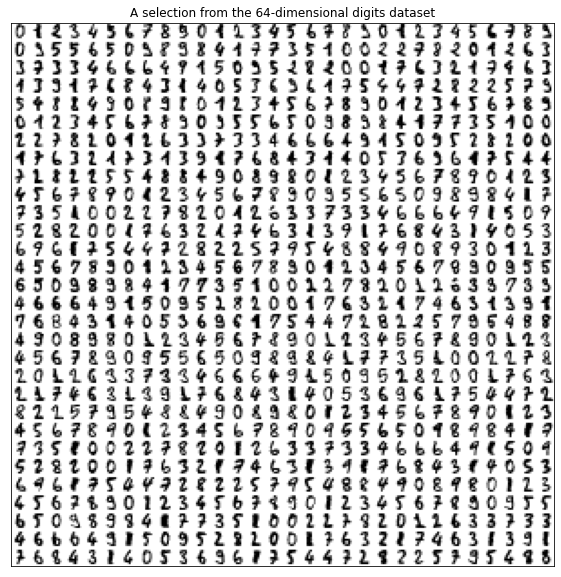

In [4]:
n_img_per_row = 30 # 每行显示30个图片
 
# 整个图形占 300*300，由于一张图片为8*8，所以每张图片周围包了一层白框，防止图片之间互相影响
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
 
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))  
plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

## 1 Random Projection

In [5]:
t0 = time() 
rp = random_projection.SparseRandomProjection(n_components=2, random_state=66)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, X, y,
               "Random Projection of the digits (time %.2fs)" %
               (time() - t0))

TypeError: list indices must be integers or slices, not str

## 2 PCA

[0.14890594 0.13618771]


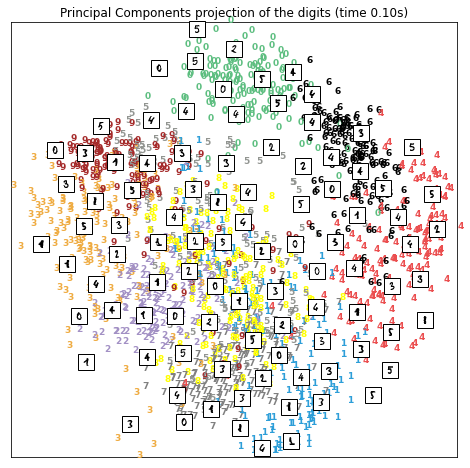

In [23]:
t0 = time()
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
plot_embedding(X_pca, y,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
print(pca.explained_variance_ratio_) # 每一个成分对原数据的方差解释了百分之多少

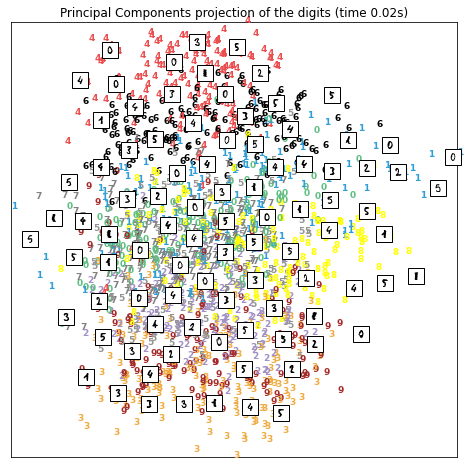

In [24]:
t0 = time()
svd = decomposition.TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)
plot_embedding(X_svd,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

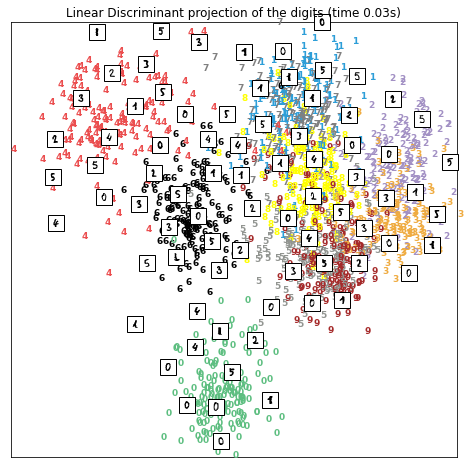

In [25]:
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # 使得X可逆
t0 = time()
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))